In [6]:
import numpy as np
import math

#Need to implement this code for ALL extrinsics files for all the images in SUNRGBD
#converts the rotation matrix in extrinsics.txt from string to a numpy array 
def rotationmatrix(matrix_path):
    matrixtext = open(matrix_path).read()
    
    x00 = float(matrixtext.split('\t')[0].split(' ')[0])
    x01 = float(matrixtext.split('\n')[0].split(' ')[1])
    x02 = float(matrixtext.split('\n')[0].split(' ')[2])
    
    x10 = float(matrixtext.split('\n')[1].split(' ')[0])
    x11 = float(matrixtext.split('\n')[1].split(' ')[1])
    x12 = float(matrixtext.split('\n')[1].split(' ')[2])
    
    x20 = float(matrixtext.split('\n')[2].split(' ')[0])
    x21 = float(matrixtext.split('\n')[2].split(' ')[1])
    x22 = float(matrixtext.split('\n')[2].split(' ')[2])
    
    #list of the matrix values excluding the 3rd column of just zeroes 
    matrixlist = [[x00, x01, x02], [x10, x11, x12], [x20, x21, x22]]
    
    #creates 3x3 array of the rotation matrix
    matrixarray = np.full((3,3), matrixlist)
    
    return matrixarray

# Reference: https://www.learnopencv.com/rotation-matrix-to-euler-angles/

# Checks if a matrix is a valid rotation matrix.
def isRotationMatrix(matrix_path) :
    R = rotationmatrix(matrix_path)
    Rt = np.transpose(R)
    shouldBeIdentity = np.dot(Rt, R)
    I = np.identity(3, dtype = R.dtype)
    n = np.linalg.norm(I - shouldBeIdentity)
    return n < 1e-6

# Calculates rotation matrix to euler angles

# The result is the same as MATLAB except the order of the euler angles ( x and z are swapped ).

def rotationMatrixToEulerAngles(path):
    R = rotationmatrix(path)
    #assert(isRotationMatrix(R))
    sy = math.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])
    singular = sy < 1e-6
    if  not singular :
        x = math.atan2(R[2,1] , R[2,2])
        y = math.atan2(-R[2,0], sy)
        z = math.atan2(R[1,0], R[0,0])
    else :
        x = math.atan2(-R[1,2], R[1,1])
        y = math.atan2(-R[2,0], sy)
        z = 0
    return np.array([x, y, z])

# Output - final roll, pitch, yaw values in radians and degrees 
def imageExtrinsics(path):
    in_array = rotationMatrixToEulerAngles(path)
    #print ("Radian values : \n", in_array) 

    degree_Values = np.degrees(in_array) 
    #print ("\nDegree values : \n", degree_Values) 
    
#     print ("\nRoll in Degrees : \n", degree_Values[0]) 
#     print ("\nPitch in Degrees : \n", degree_Values[1]) 
#     print ("\nYaw in Degrees : \n", degree_Values[2]) 
    
    return degree_Values[0], degree_Values[1], degree_Values[2]
    
# Need to write code that accesses the extrinsics file for all the images in SUNRGBD and export to an excel sheet?
    
p = '/Users/prachi/Documents/depth_duration/SUNRGBD/kv2/kinect2data/002630_2014-06-24_14-47-50_094959634447_rgbf000055-resize/extrinsics/20140704233245.txt'

imageExtrinsics(p)




(-23.6017603901825, -0.05099322697173033, -0.24396615044128248)

Sources:

http://web.mit.edu/2.05/www/Handout/HO2.PDF

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.html#scipy.spatial.transform.Rotation

In [7]:
from scipy.spatial.transform import Rotation as R

def scipy_extrinsics(extrinsics_path):

    matrix = rotationmatrix(extrinsics_path)

    r = R.from_matrix(matrix)
    r = r.as_euler('zyx', degrees=True)

    # Roll Pitch Yaw XYZ (g,b,a) ¤ Euler ZYX (a,b,g) 

    rpy = {'roll': r[2], 'pitch': r[1] , 'yaw': r[0]}
    return rpy

In [42]:
import os 
import matplotlib.pyplot as plt
from IPython.display import Image

def extrinsics_distribution(kinectv2):
    rolls = []
    pitches = []
    yaws = []
    roll_paths = [] # images with roll value set below
    roll_extrinsics = []
    pitch_paths = [] # images with roll value set below
    pitch_extrinsics = []
    for imagefolder in os.listdir(kinectv2):
        if imagefolder != '.DS_Store':
            extpath = kinectv2 + '/' + imagefolder + '/extrinsics' 
            fname = os.listdir(extpath)[0]
            if fname != '.ipynb_checkpoints':
                extrinsics = scipy_extrinsics(extpath + '/' + fname)
                rolls.append(extrinsics['roll'])
                pitches.append(extrinsics['pitch'])
                yaws.append(extrinsics['yaw'])
                imagepath = kinectv2 + '/' + imagefolder + '/image'
                iname = os.listdir(imagepath)[0]
                if -100 < extrinsics['roll'] < 0:
                    roll_paths.append(imagepath + '/' + iname)
                    roll_extrinsics.append(extrinsics)
                if -10 < extrinsics['pitch'] < -1:
                    pitch_paths.append(imagepath + '/' + iname)
                    pitch_extrinsics.append(extrinsics)    
                    
    return rolls, pitches, yaws, roll_paths, roll_extrinsics, pitch_paths, pitch_extrinsics


In [43]:
kinectv2_path = '/Users/prachi/Documents/depth_duration/SUNRGBD/kv2/kinect2data'

subset = '/Users/prachi/Documents/depth_duration/kinect2data_subset'

ext_kinectv2 = extrinsics_distribution(kinectv2_path)

Need to set new criterion for image exclusion based on images below

/Users/prachi/Documents/depth_duration/SUNRGBD/kv2/kinect2data/000003_2014-05-26_14-24-42_260595134347_rgbf000040-resize/image/0000040.jpg
{'roll': -6.653755818008849, 'pitch': 0.6776511175639955, 'yaw': -11.617615130643268}
3461


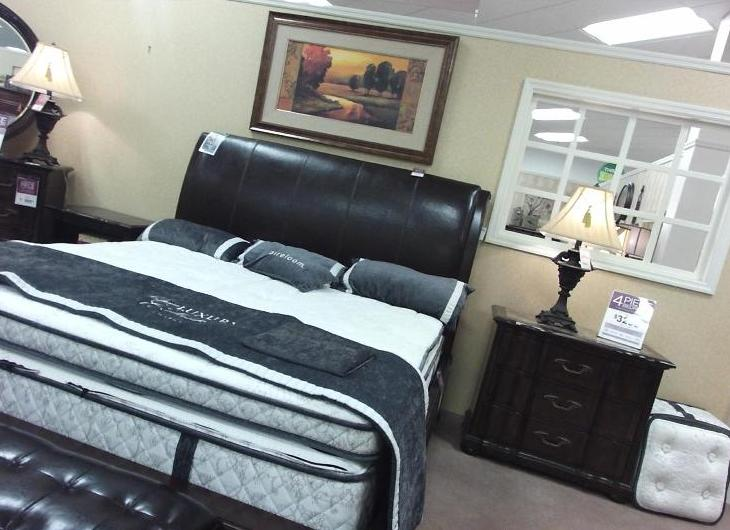

In [11]:
rollpaths = ext_kinectv2[3]
roll_extrinsics = ext_kinectv2[4]
i = 0
#6
print(rollpaths[i])
print(roll_extrinsics[i])
print(len(rollpaths))
Image(filename=rollpaths[i]) 


#000011_2014-05-26_14-33-11_260595134347_rgbf000020-resize/image/0000020.jpg
#000010_2014-05-26_14-32-36_260595134347_rgbf000020-resize/image/0000020.jpg


/Users/prachi/Documents/depth_duration/SUNRGBD/kv2/kinect2data/000060_2014-04-29_14-37-21_094959634447_rgbf000100-resize/image/0000100.jpg
{'roll': -30.380764937604173, 'pitch': -1.0131772508896906, 'yaw': 3.7303662578491394}
215


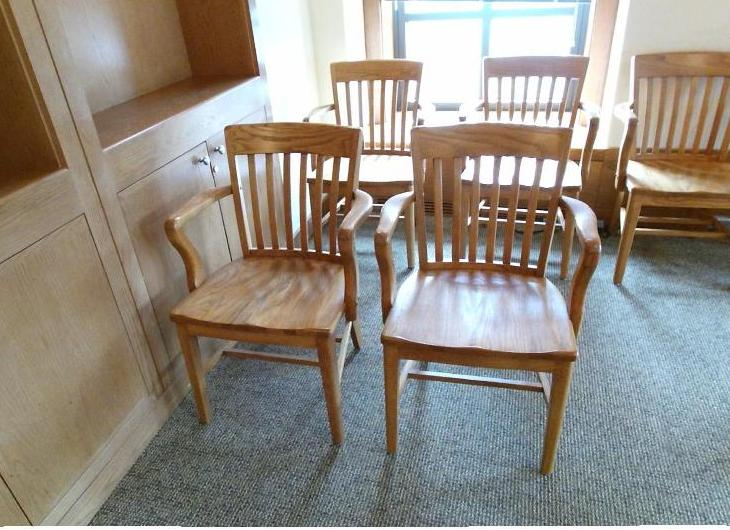

In [46]:
pitchpaths = ext_kinectv2[5]
pitch_extrinsics = ext_kinectv2[6]
i = 2

print(pitchpaths[i])
print(pitch_extrinsics[i])
print(len(pitchpaths))
Image(filename=pitchpaths[i]) 



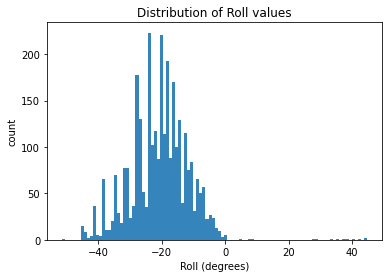

-20.57363246847825 9.237467890556177


In [370]:
from scipy import stats

plt.hist(ext_kinectv2[0], bins=100, alpha=0.9)
plt.title('Distribution of Roll values')
plt.xlabel('Roll (degrees)')
plt.ylabel('count')

plt.show()

mu, sigma = scipy.stats.norm.fit(ext_kinectv2[0])
print(mu, sigma)



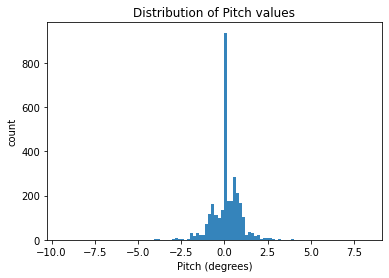

0.11819266774160622 0.8748471569146528


In [371]:
plt.hist(ext_kinectv2[1], bins=100, alpha=0.9)
plt.title('Distribution of Pitch values')
plt.xlabel('Pitch (degrees)')
plt.ylabel('count')

plt.show()

mu, sigma = scipy.stats.norm.fit(ext_kinectv2[1])
print(mu, sigma)

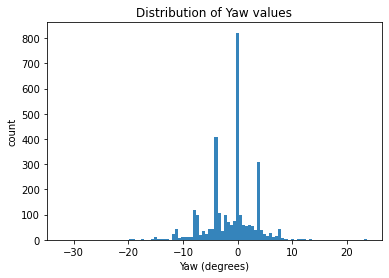

-1.1753395901169146 4.495770101136111


In [372]:
plt.hist(ext_kinectv2[2], bins=100, alpha=0.9)
plt.title('Distribution of Yaw values')
plt.xlabel('Yaw (degrees)')
plt.ylabel('count')

plt.show()

mu, sigma = scipy.stats.norm.fit(ext_kinectv2[2])
print(mu, sigma)

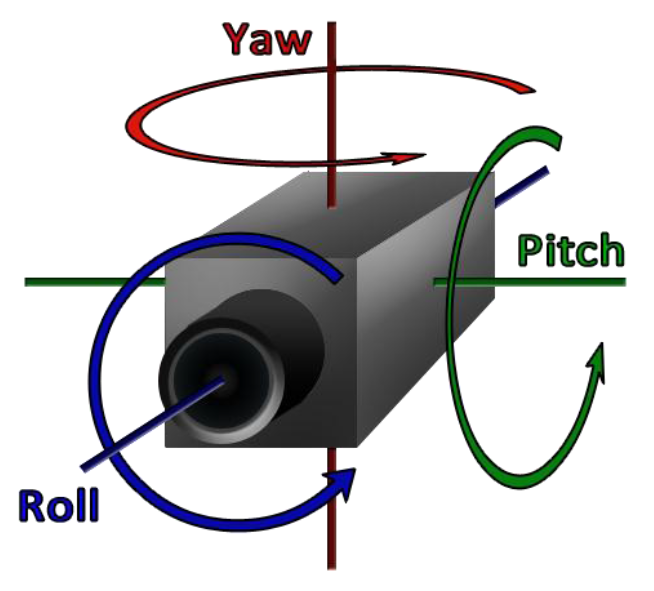